In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Read in data

In [19]:
filesample = 'FinancialDataSampleSet2010to2015.csv'
filefull = 'Full990Efile+Operational+Data+2009+to+2015.csv'

#datasample = pd.read_csv(filesample, encoding='cp1252')

datafull = pd.read_csv(filesample, encoding='cp1252', 
                       usecols=['EIN','STATE','FISYR','TOTALREVCURRENT','TOTALEXPCURRENT', 'FORMTYPE', 'NteeFinal',
                               'TOTEMPLOYEE', 'TOTVOLUNTEERS', 'REVLESSEXPCURRENT'])
datafull.head()

C:\Users\jehun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,EIN,FISYR,STATE,FORMTYPE,TOTEMPLOYEE,TOTVOLUNTEERS,TOTALREVCURRENT,TOTALEXPCURRENT,REVLESSEXPCURRENT,NteeFinal
0,451298367.0,2012,AL,990,0.0,0.0,584971.0,42059.0,542912.0,B8340
1,136140969.0,2013,NY,990,19.0,NaN,1370756.0,1413199.0,-42443.0,E62
2,270018002.0,2013,NY,990,3.0,1.0,310417.0,372973.0,-62556.0,L50
3,363871153.0,2014,IL,990,0.0,9.0,2256254.0,2363905.0,-107651.0,J40
4,736103184.0,2012,OK,990,0.0,NaN,232944.0,241775.0,-8831.0,S30


In [20]:
datafull.index.names

FrozenList([None])

In [21]:
datafull.shape

(367329, 10)

In [22]:
datafull.columns

Index(['EIN', 'FISYR', 'STATE', 'FORMTYPE', 'TOTEMPLOYEE', 'TOTVOLUNTEERS',
       'TOTALREVCURRENT', 'TOTALEXPCURRENT', 'REVLESSEXPCURRENT', 'NteeFinal'],
      dtype='object')

# Indexing

Compute net income, obtain year-on-year index. Divide over all relevant charities in State. This ratio indicates relative volatility compared to the broad-spectrum charities on market in state.

Treat missing values in PREV_NIT as NIT

In [181]:
def get_ind_indices(curr_criteria):
    data = datafull.query('(FISYR > 2009) & (FISYR < 2015)')
    data = data[data.FORMTYPE=='990']
    #data.set_index(['EIN', 'FISYR'], inplace=True)
    #prev_criteria = data.groupby(level=0)[curr_criteria].shift(1)
    data.set_index(['EIN', 'FISYR'], inplace=True)
    #data['PREV_'+curr_criteria] = data.groupby(level=0)[curr_criteria].shift(1)
    curr = data.groupby(['EIN','FISYR'])[curr_criteria].sum()
    prev = curr.shift(1)
    
    #print(curr)
    #print(prev)

    #data['IND'] = (data[curr_criteria]/data['PREV_'+curr_criteria]).cumsum()
    data['IND'] = (curr/prev)
    data.IND.replace(np.inf, np.nan, inplace=True)
    data.IND.replace(-1*np.inf, np.nan, inplace=True)
    data.IND.fillna(1, inplace=True)
    return data

In [182]:
eins = get_ind_indices('REVLESSEXPCURRENT')
eins.head()

,,STATE,FORMTYPE,TOTEMPLOYEE,TOTVOLUNTEERS,TOTALREVCURRENT,TOTALEXPCURRENT,REVLESSEXPCURRENT,NteeFinal,IND
EIN,FISYR,,,,,,,,,
43045957.0,2012,MA,990,7.0,0.0,225451.0,214298.0,11153.0,B21,12.804822
146168657.0,2014,CT,990,0.0,4.0,166165.0,184969.0,-18804.0,B12,-0.547440
262906354.0,2010,CA,990,86.0,0.0,2112800.0,2017737.0,95063.0,P50,0.492991
510176948.0,2012,CA,990,0.0,NaN,154913.0,118793.0,36120.0,I1160,7.498443
990342126.0,2011,HI,990,6.0,30.0,505429.0,455437.0,49992.0,F22,0.372883


In [183]:
def get_br_indices(curr_criteria):
    broad = datafull.query('FISYR > 2009 & FISYR < 2015')
    broad = broad[broad.FORMTYPE=='990']
    #broad.index.names
    
    #broad.set_index(['STATE', 'FISYR'], inplace=True)
    #broad.index.names
    
    br_curr = broad.groupby(['STATE','FISYR'])[curr_criteria].sum()
    br_prev = br_curr.shift(1)
    
    
    print(br_curr)
    print(br_prev)
        
    new = pd.DataFrame()
    new['BR_IND'] = (br_curr/br_prev).cumsum()
    new.BR_IND.replace(np.inf, np.nan, inplace=True)
    new.BR_IND.replace(-1*np.inf, np.nan, inplace=True)
    new.BR_IND.fillna(1, inplace=True)
    return new

In [184]:
br = get_br_indices('REVLESSEXPCURRENT')
br.head()

STATE  FISYR
AK     2010        130130.0
       2011      13292272.0
       2012         10412.0
       2013       -836607.0
       2014       1068300.0
AL     2010       1196321.0
       2011        441871.0
       2012      -3148787.0
       2013      -3708385.0
       2014       -903700.0
AR     2010      -1059844.0
       2011       4210033.0
       2012       -455754.0
       2013       -650933.0
       2014        607486.0
AZ     2010        235828.0
       2011       2548316.0
       2012      21068899.0
       2013        541729.0
       2014       2333099.0
CA     2010      69498640.0
       2011      55749251.0
       2012      58880157.0
       2013      46161881.0
       2014      31705321.0
CO     2010       -174713.0
       2011      20704573.0
       2012       5736903.0
       2013       3942519.0
       2014       5972441.0
                   ...     
VA     2010      57998951.0
       2011       5333769.0
       2012       6837512.0
       2013       7553416.0
       

BR_IND
STATE FISYR            
AK    2010     1.000000
      2011   102.146100
      2012   102.146883
      2013    21.796614
      2014    20.519671

In [185]:
def get_all(ind, br):
    all = pd.merge(ind.reset_index(), br.reset_index(), how='inner', on=['STATE','FISYR']).set_index(['EIN','FISYR'])
    #all = pd.merge(ind, br)
    return all

In [186]:
all = get_all(eins, br)
all.head()

,,STATE,FORMTYPE,TOTEMPLOYEE,TOTVOLUNTEERS,TOTALREVCURRENT,TOTALEXPCURRENT,REVLESSEXPCURRENT,NteeFinal,IND,BR_IND
EIN,FISYR,,,,,,,,,,
43045957.0,2012,MA,990,7.0,0.0,225451.0,214298.0,11153.0,B21,12.804822,59.300658
43080792.0,2012,MA,990,16.0,0.0,176791.0,124735.0,52056.0,N67,1.841126,59.300658
201690628.0,2012,MA,990,13.0,25.0,273565.0,327545.0,-53980.0,A32,25.595069,59.300658
43172689.0,2012,MA,990,30.0,150.0,1003053.0,944068.0,58985.0,B25,1.518471,59.300658
222967780.0,2012,MA,990,54.0,18.0,1415565.0,1440392.0,-24827.0,P33,0.403560,59.300658


In [99]:
all.index.names

FrozenList(['EIN', 'FISYR'])

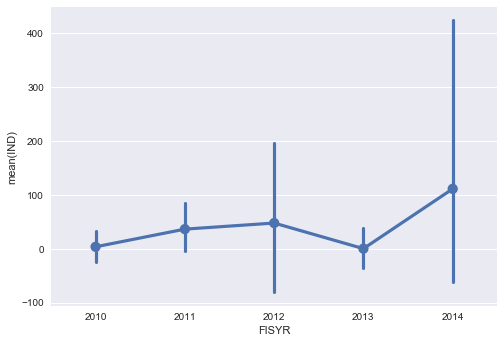

In [189]:
plotdf_all = all.reset_index()
plotdf_all.index.names
sns.pointplot(x="FISYR", y="IND",data=plotdf_all)
plt.show()
